# Importing Packages

In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer



XGBoostError: XGBoost Library (libxgboost.so) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['libgomp.so.1: cannot open shared object file: No such file or directory']


## Reading Train and test data 

In [2]:
test_data = pd.read_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/test.csv")
train_data = pd.read_csv("~/Pet_Projects/House_price_predictions/house-prices-raw/train.csv")
print("Train_data_head")
train_y = train_data['SalePrice']
train_x = train_data.drop('SalePrice',1)
test_x = test_data
df_prepare = pd.concat([train_x,test_x]).reset_index(drop = True) 
df_prepare.drop('Id',1,inplace=True)
len(train_x.columns)
#df_prepare

Train_data_head


80

## Missing Data Distribution 

In [4]:
def missing_data_distribution(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing = missing/len(df_prepare)
    missing.sort_values(ascending = False, inplace=True)
    missing = missing * 100
    missing.plot.bar()
    print(missing.head(20))

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
dtype: float64


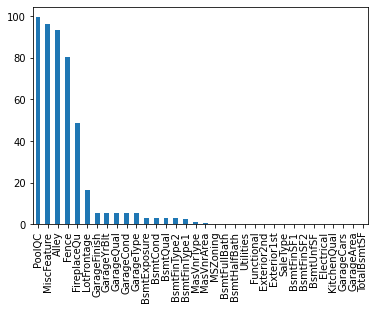

In [5]:
missing_data_distribution(df_prepare)

In [6]:
## PoolQC , Alley , Fence , MiscFeature ,FireplaceQu Missing for more than 50% of the data 
columns_to_be_dropped = ['MiscFeature']


## Seperating  Numeric and CategoricalData

In [7]:
def seperating_data(df):
    numeric_data = df.select_dtypes(include=[np.number])
    categorical_data = df.select_dtypes(exclude=[np.number])
    print(numeric_data.head())
    print(categorical_data.head())
    return numeric_data,categorical_data
#categorical_data.head()

In [8]:
numeric_data,categorical_data = seperating_data(df_prepare)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0          2003       196.0       706.0         0.0  ...       548.0   
1          1976         0.0       978.0         0.0  ...       460.0   
2          2002       162.0       486.0         0.0  ...       608.0   
3          1970         0.0       216.0         0.0  ...       642.0   
4          2000       350.0       655.0         0.0  ...       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61     

In [9]:
#df.replace('?',np.NaN,inplace=True)
#imp=SimpleImputer(missing_values=np.NaN)
#idf=pd.DataFrame(imp.fit_transform(df))
#idf.columns=df.columns
#idf.index=df.index
#idf['bare_nuclei'].isna().sum()

## Impute missing values using SimpleImputer (Mean Value)

In [10]:

def numerical_impute(df):
    my_imputer = SimpleImputer()
    new_data_1 = df.copy()
    my_imputer = SimpleImputer()
    new_data_1 = pd.DataFrame(my_imputer.fit_transform(new_data_1))
    new_data_1.columns = numeric_data.columns
    new_data_1.index = numeric_data.index
    missing_new = new_data_1.isnull().sum()
    print(missing_new)
    return new_data_1


In [11]:
numeric_data = numerical_impute(numeric_data)

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [12]:
#from sklearn_pandas import CategoricalImputer
#new_data_2 = categorical_data.copy()
#imputer = CategoricalImputer()
#new_data_2 = pd.DataFrame(imputer.fit_transform(new_data_2))
#new_data_2.columns = categorical_data.columns
#new_data_2.index = categorical_data.index
#missing_new_2 = new_data_2.isnull().sum()



In [13]:
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data


In [14]:
def categorical_impute(df):
    #instantiate both packages to use
    encoder = OrdinalEncoder()
    imputer = IterativeImputer(ExtraTreesRegressor())
    #create a list of categorical columns to iterate over
    cat_cols = df.columns

    def encode(data):
        '''function to encode non-null data and replace it in the original data'''
        #retains only non-null values
        nonulls = np.array(data.dropna())
        #reshapes the data for encoding
        impute_reshape = nonulls.reshape(-1,1)
        #encode date
        impute_ordinal = encoder.fit_transform(impute_reshape)
        #Assign back encoded values to non-null values
        data.loc[data.notnull()] = np.squeeze(impute_ordinal)
        return data

    #create a for loop to iterate through each column in the data
    for columns in cat_cols:
        encode(df[columns])
    encode_data = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)
    return encode_data


In [15]:
new_data_2 = categorical_data.copy()
a = categorical_impute(new_data_2)
print(a)
# encode_data

/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

/home/naruto_uzumaki/Pet_Projects/env/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


      MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0          3.0     1.0    1.0       3.0          3.0        0.0        4.0   
1          3.0     1.0    0.0       3.0          3.0        0.0        2.0   
2          3.0     1.0    1.0       0.0          3.0        0.0        4.0   
3          3.0     1.0    0.0       0.0          3.0        0.0        0.0   
4          3.0     1.0    1.0       0.0          3.0        0.0        2.0   
...        ...     ...    ...       ...          ...        ...        ...   
2914       4.0     1.0    0.0       3.0          3.0        0.0        4.0   
2915       4.0     1.0    0.0       3.0          3.0        0.0        4.0   
2916       3.0     1.0    0.0       3.0          3.0        0.0        4.0   
2917       3.0     1.0    0.0       3.0          3.0        0.0        4.0   
2918       3.0     1.0    0.0       3.0          3.0        0.0        4.0   

      LandSlope  Neighborhood  Condition1  ...  GarageType  Gar

In [ ]:
## Feature Engineering Ideas :: Age of the house


## Concat both numerical and categorical data

In [ ]:
df_imputed = pd.concat([numeric_data.reset_index(drop=True), categorical_data], axis=1)
df_imputed.fillna('None', inplace = True) 
missing_new = df_imputed.isnull().sum()
missing_new.sort_values(ascending=False,inplace=True)
missing_new.head(100)